In [64]:
import os 
import pandas as pd
import numpy as np
from pydub import AudioSegment

import IPython.display as ipd

import librosa
import librosa.display
import matplotlib.pyplot as plt

import processing

In [65]:
audio_folder = '../../data/ICBHI_final_database'

In [66]:
df_info = pd.read_csv('../../data/info_dataset.csv',index_col=0)

In [67]:
df_info = df_info[(df_info.wheeze!=0) & (df_info.crackle!=0)]

In [68]:
df_info = df_info[df_info.recording_type != 'Meditron']

In [76]:
df_info

,Participant_ID,Age,Sex,Adult BMI (kg/m2),Child Weight (kg),Child Height (cm),Outcome,filename,wheeze,crackle,recording_type
13,107.0,75.0,F,33.7,NaN,NaN,COPD,107_2b3_Ar_mc_AKGC417L,7.0,25.0,AKGC417L
14,107.0,75.0,F,33.7,NaN,NaN,COPD,107_2b5_Pr_mc_AKGC417L,1.0,15.0,AKGC417L
15,107.0,75.0,F,33.7,NaN,NaN,COPD,107_2b4_Al_mc_AKGC417L,2.0,16.0,AKGC417L
16,107.0,75.0,F,33.7,NaN,NaN,COPD,107_3p2_Lr_mc_AKGC417L,6.0,8.0,AKGC417L
17,107.0,75.0,F,33.7,NaN,NaN,COPD,107_3p2_Al_mc_AKGC417L,3.0,22.0,AKGC417L
...,...,...,...,...,...,...,...,...,...,...,...
900,221.0,74.0,F,29.0,NaN,NaN,COPD,221_2b1_Al_mc_LittC2SE,5.0,14.0,LittC2SE
901,221.0,74.0,F,29.0,NaN,NaN,COPD,221_2b2_Lr_mc_LittC2SE,4.0,22.0,LittC2SE
902,221.0,74.0,F,29.0,NaN,NaN,COPD,221_2b1_Lr_mc_LittC2SE,6.0,14.0,LittC2SE
904,221.0,74.0,F,29.0,NaN,NaN,COPD,221_2b3_Pr_mc_LittC2SE,6.0,8.0,LittC2SE


In [81]:
audio_subject = df_info.filename.iloc[0]
audio_subject='107_3p2_Lr_mc_AKGC417L'
audio_data_file, audio_event_file = processing.load_file_from_recording_name(audio_folder,audio_subject)
data_filtered = processing.preprocess_data(audio_data_file, audio_event_file)

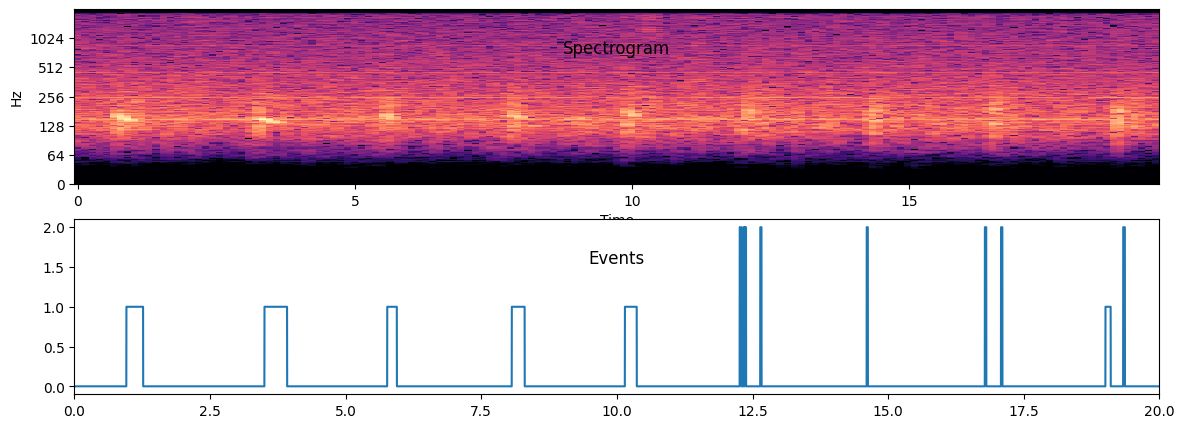

In [82]:
X = librosa.stft(data_filtered['data'],center=False)
Xdb = librosa.amplitude_to_db(abs(X))

f = plt.figure(figsize=(14, 5))
ax = f.add_subplot(211)
librosa.display.specshow(Xdb, sr=data_filtered['fs'], x_axis='time', y_axis='log')
ax.set_title('Spectrogram',y=0.7)
ax = f.add_subplot(212)
ax.plot(data_filtered['time'],data_filtered['label'])
ax.set_xlim([data_filtered['time'][0],data_filtered['time'][-1]])
ax.set_title('Events',y=0.7)
ipd.Audio(audio_data_file)

(0.0, 20.0)

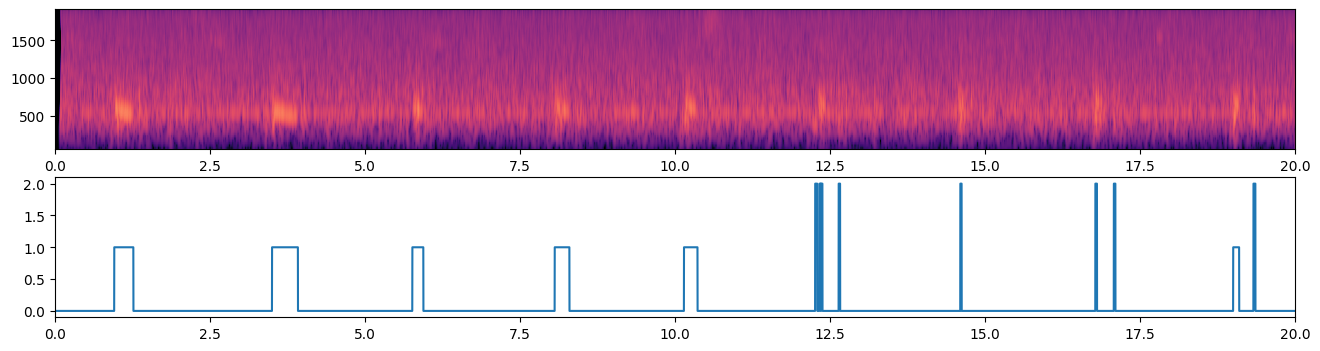

In [83]:
data_wv = processing.apply_wavelets(data_filtered)

DB_RANGE = 100 # dynamic range to show in dB
CMAP = 'magma'

x = 20*data_wv['data']
f = plt.figure(figsize = (16,4))
ax = f.add_subplot(211)
ax.imshow(x, cmap=CMAP, aspect='auto', norm=None, vmax=0, vmin=-100,extent=[data_wv['time'][0],data_wv['time'][-1],data_wv['freq'][0],data_wv['freq'][-1]])
#ax.invert_yaxis()
ax = f.add_subplot(212)
ax.plot(data_wv['time'],data_wv['label'])
ax.set_xlim([data_wv['time'][0],data_wv['time'][-1]])


/var/folders/xx/qddw26dx0174zw4hpmjq3gjh0000gn/T/ipykernel_9328/1597157422.py:1: FutureWarning: Pass y=[-2.54804992e-07 -2.54805005e-07 -2.54805024e-07 ...  3.57348960e-03
  1.21638512e-02  1.37787401e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spectrogram = librosa.feature.melspectrogram(data_filtered['data'],sr=data_filtered['fs'],n_mels=20)


(0.0, 20.0)

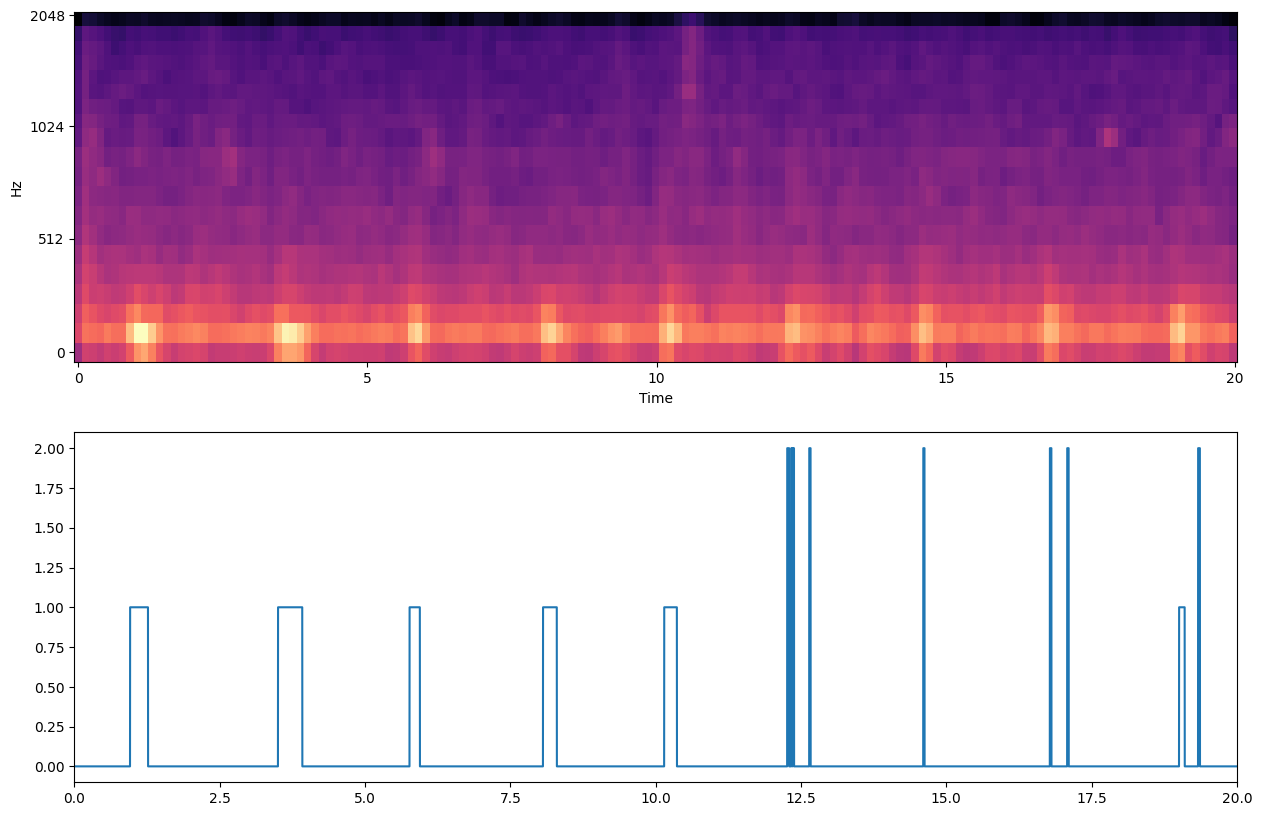

In [84]:
mel_spectrogram = librosa.feature.melspectrogram(data_filtered['data'],sr=data_filtered['fs'],n_mels=20)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

f = plt.figure(figsize=(15,10))
ax = f.add_subplot(211)
ax = librosa.display.specshow(log_mel_spectrogram,
                         x_axis='time',
                         y_axis='mel',
                         sr=data_filtered['fs'])
ax = f.add_subplot(212)
ax.plot(data_filtered['time'],data_filtered['label'])
ax.set_xlim([data_filtered['time'][0],data_filtered['time'][-1]])